In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Creating database connect
conn=sqlite3.connect('inventory.db')
#Fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalQuantity,10692.0,3140.886831,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


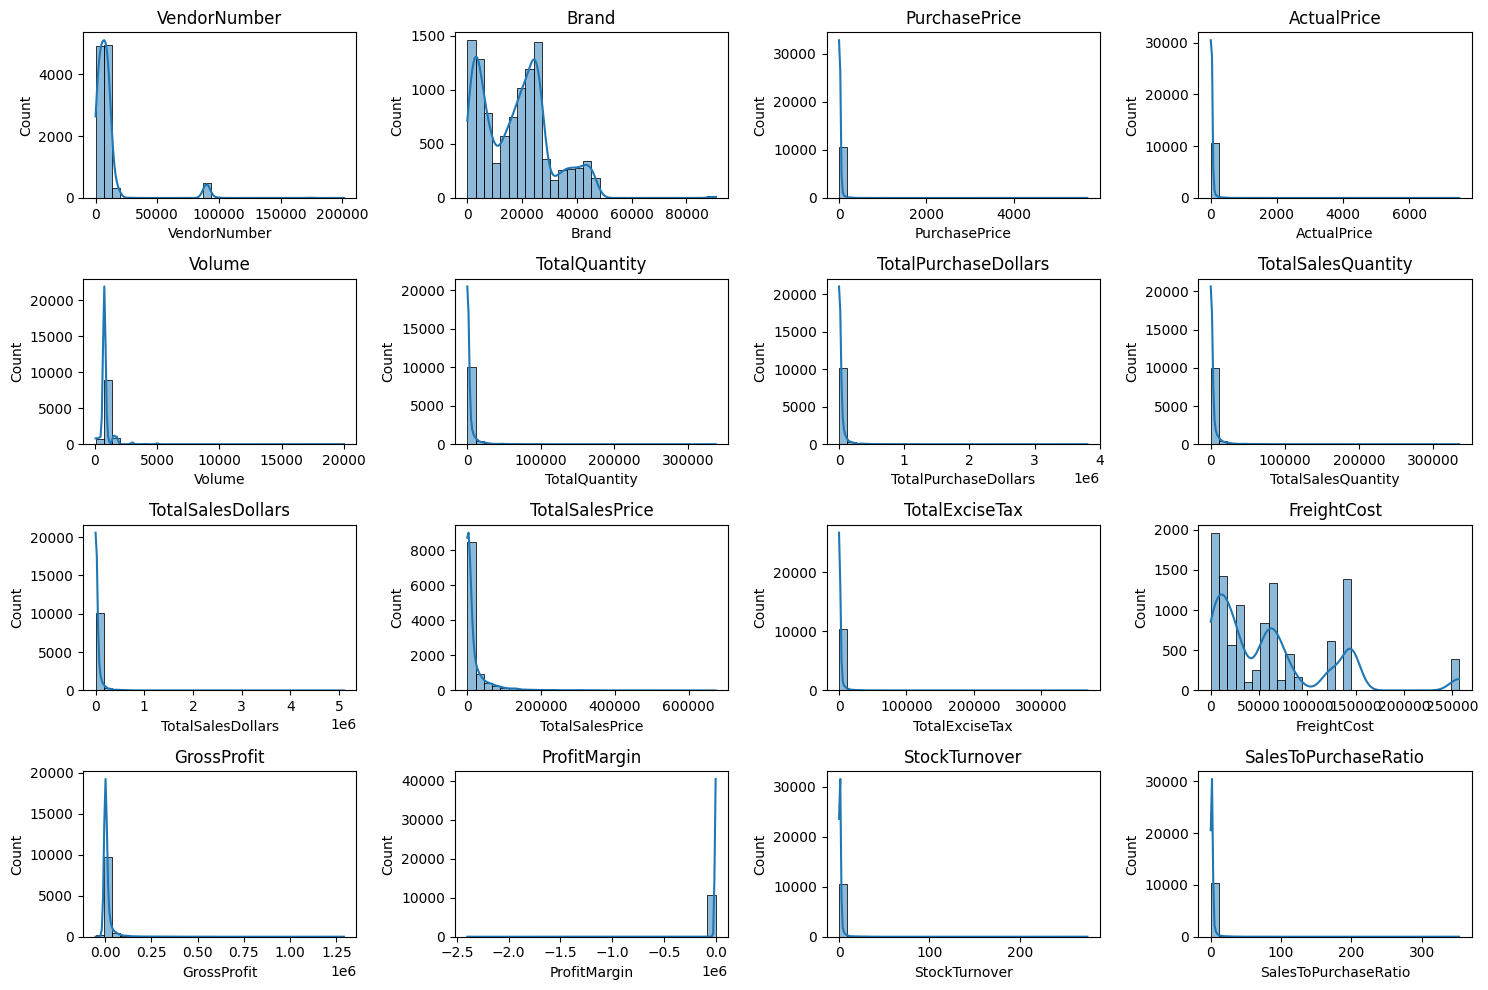

In [4]:
#Distribution plots for Numerical Columns
numerical_columns=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

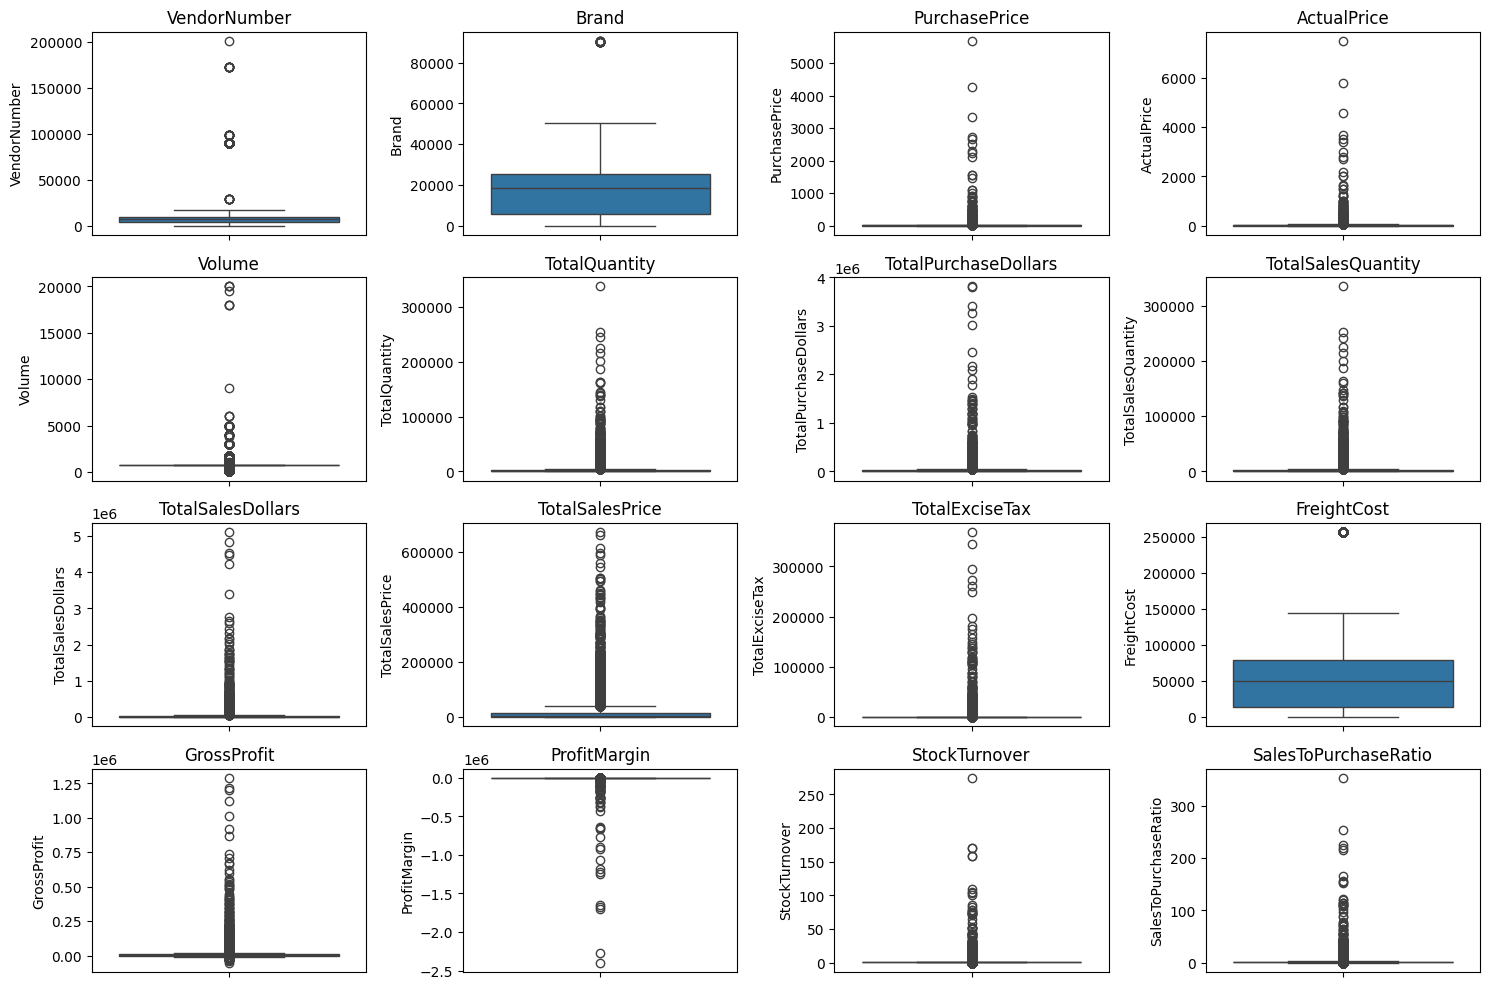

In [6]:
#Outlier detection with boxplot
numerical_columns=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
#Filter the data by removing inconsistences
df=pd.read_sql_query("""SELECT *
                     FROM vendor_sales_summary
                     WHERE GrossProfit>0
                     AND ProfitMargin>0
                     AND TotalSalesQuantity>0
                     """,conn)
df


,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


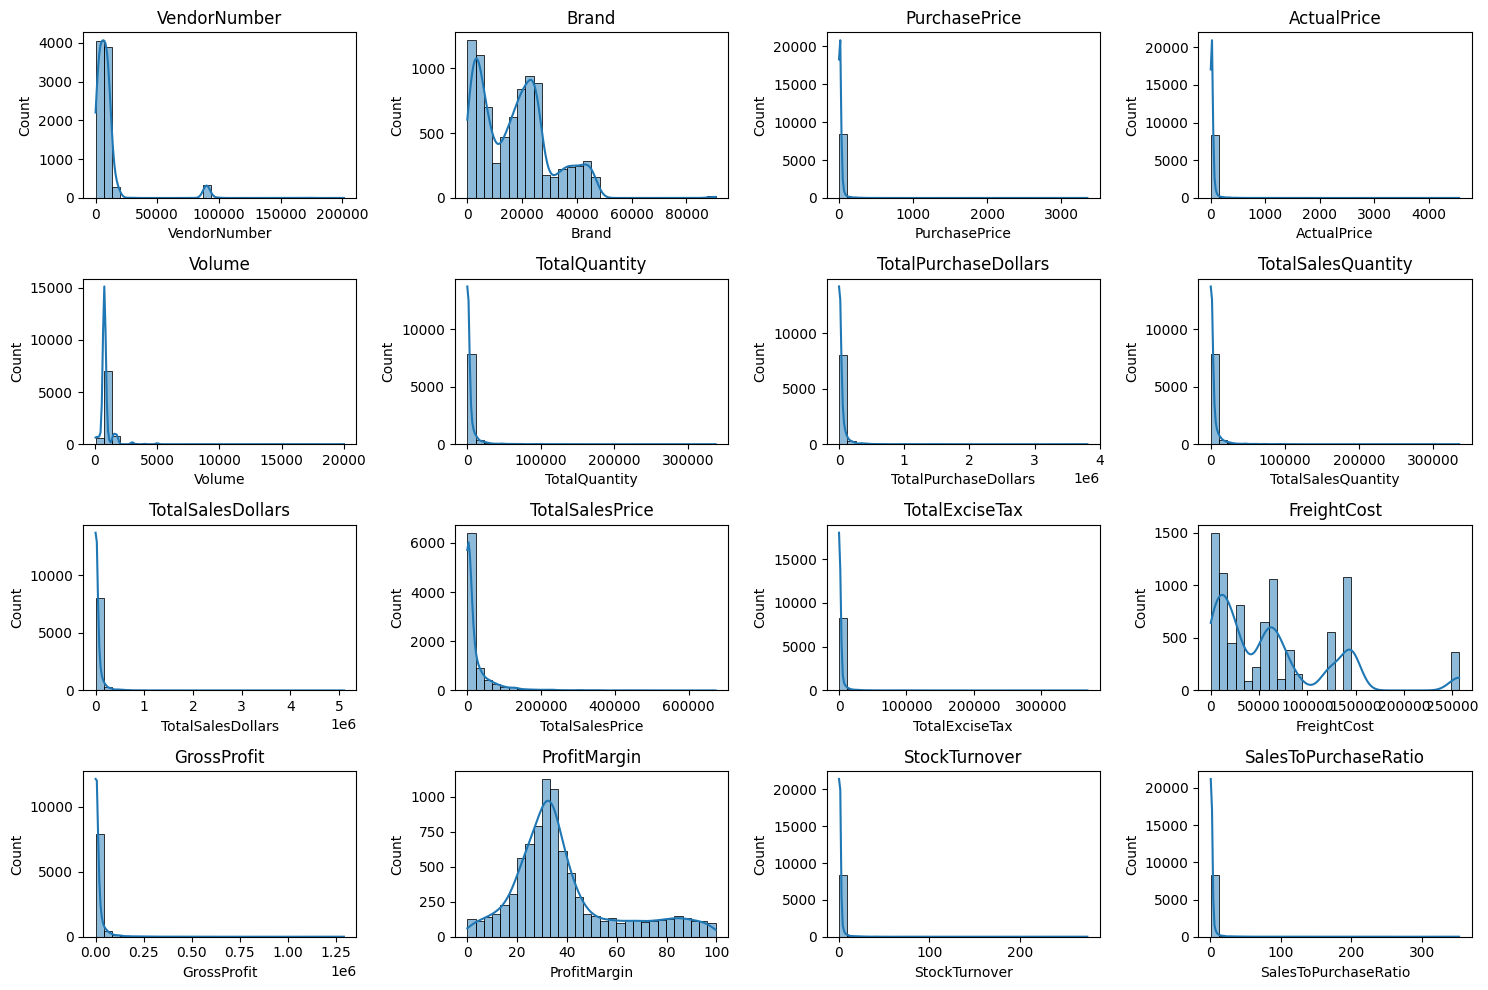

In [8]:
#Distribution plots for Numerical Columns
numerical_columns=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

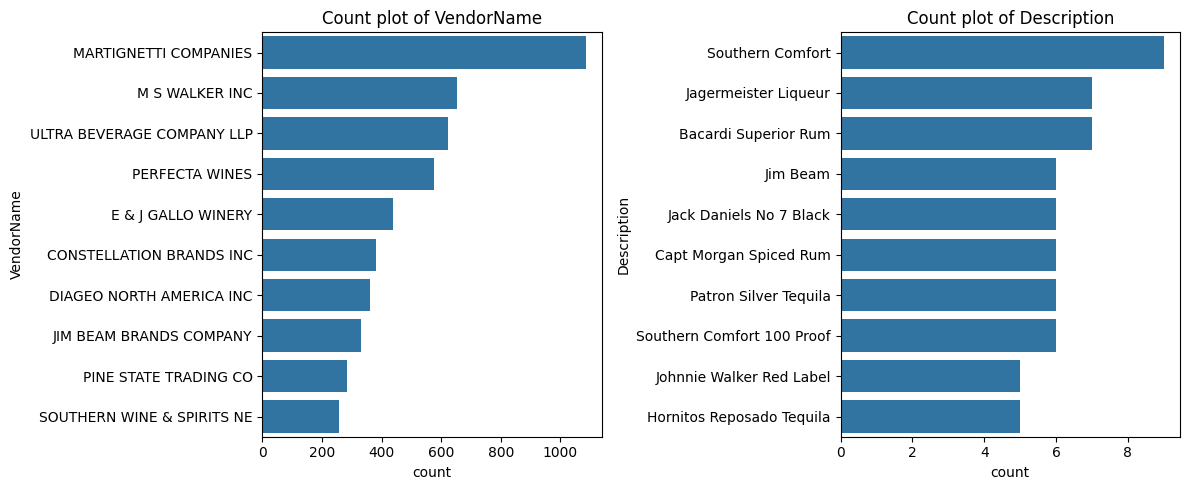

In [7]:
#Count plots for categorical columns
categorical_columns=['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_columns):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

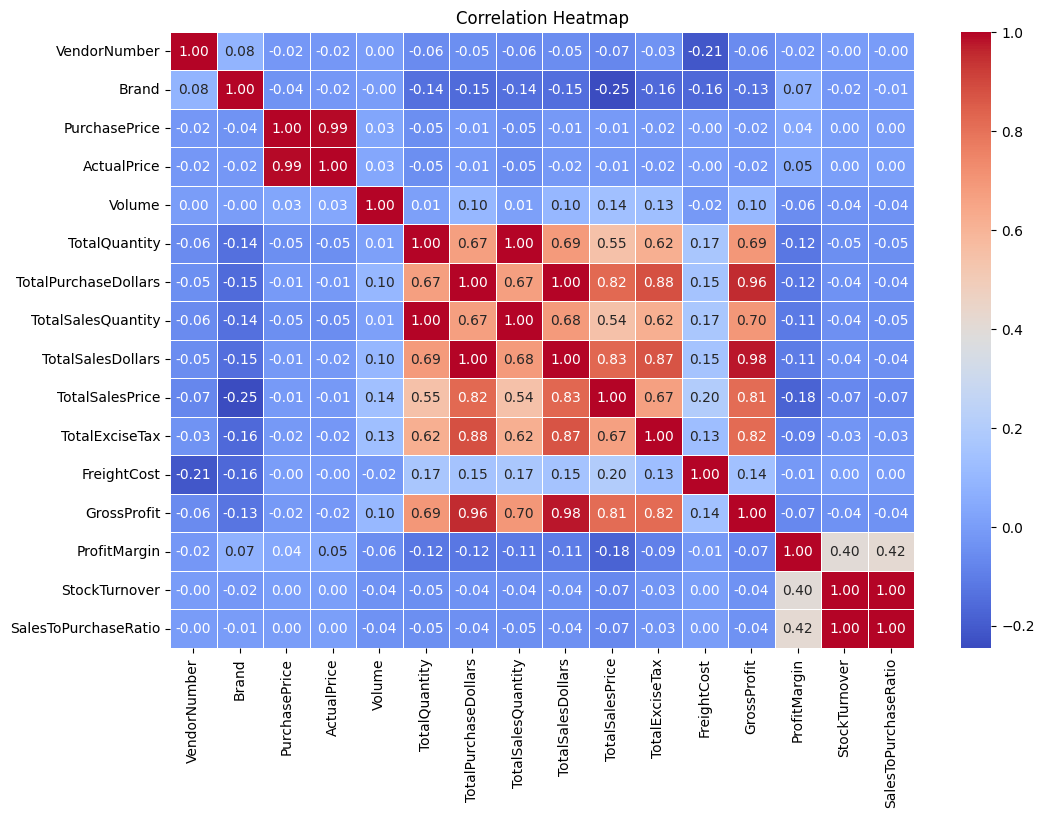

In [9]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_columns].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Identify brands that need promotional pricing adjustments which exhibit lower sale performance but higher profit margin

In [10]:
brand_performance_data=df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()
brand_performance_data

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [11]:
lower_sale_threshold=brand_performance_data['TotalSalesDollars'].quantile(0.15)
higher_margin_threshold=brand_performance_data['ProfitMargin'].quantile(0.85)

In [12]:
lower_sale_threshold

np.float64(560.299)

In [13]:
higher_margin_threshold

np.float64(64.97017552750113)

In [14]:
#Filter brand with lower sale but higher profit margin
taget_brands=brand_performance_data[(brand_performance_data['TotalSalesDollars']<=lower_sale_threshold)&
                                    (brand_performance_data['ProfitMargin']>=higher_margin_threshold)]
print("Brands with lower sale but high profit margin")
display(taget_brands.sort_values('TotalSalesDollars'))

Brands with lower sale but high profit margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance_data=brand_performance_data[brand_performance_data['TotalSalesDollars']<10000]

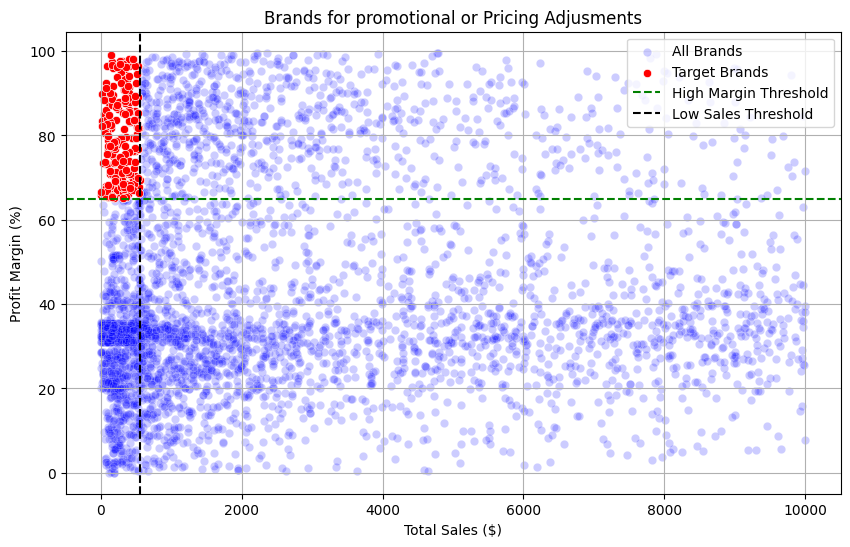

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance_data,x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=taget_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Target Brands')

plt.axhline(higher_margin_threshold,linestyle='--',color='green',label='High Margin Threshold')
plt.axvline(lower_sale_threshold,linestyle='--',color='black',label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or Pricing Adjusments")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Which vendors and brands demonstrate the highest sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [21]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [22]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

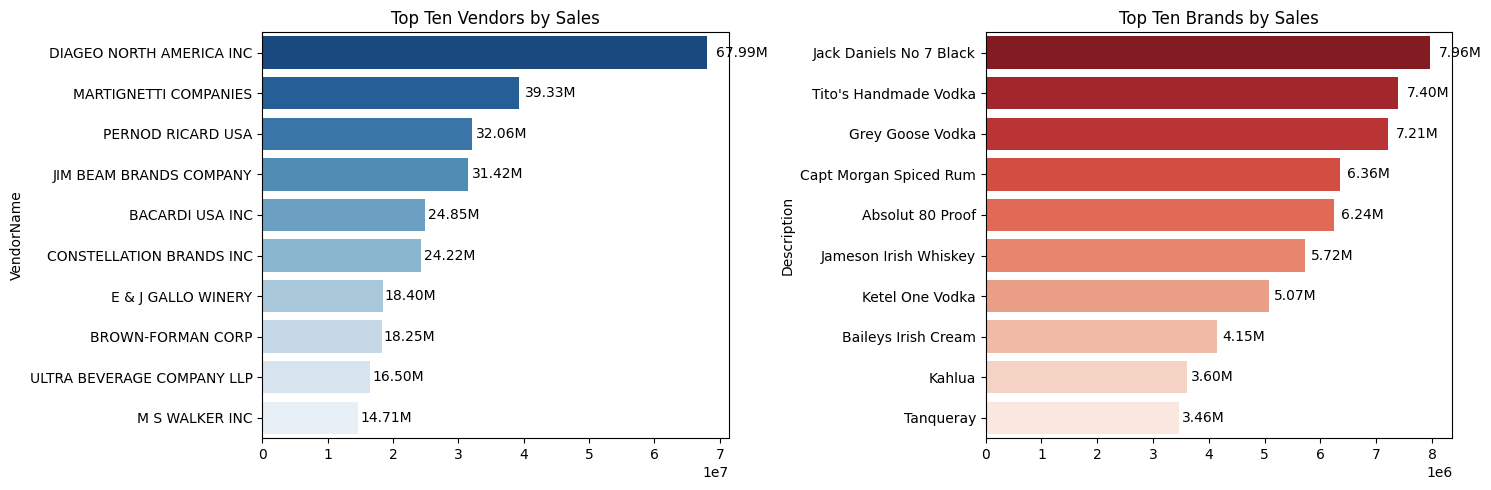

In [23]:
plt.figure(figsize=(15,5))

#Plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top Ten Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center', fontsize=10,color='black'
             )

#Plot for top Brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index,x=top_brands.values,palette="Reds_r")
plt.title("Top Ten Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center', fontsize=10,color='black'
             )


plt.tight_layout()
plt.show()

In [24]:
def add_bar_labels(ax, formatter):
    """
    Add value labels to horizontal bars.
    
    ax: matplotlib axis
    formatter: function to format the value (e.g., format_dollars)
    """
    for bar in ax.patches:
        width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2

        ax.text(
            width + (width * 0.02),
            y_pos,
            formatter(width),
            ha='left',
            va='center',
            fontsize=10,
            color='black'
        )


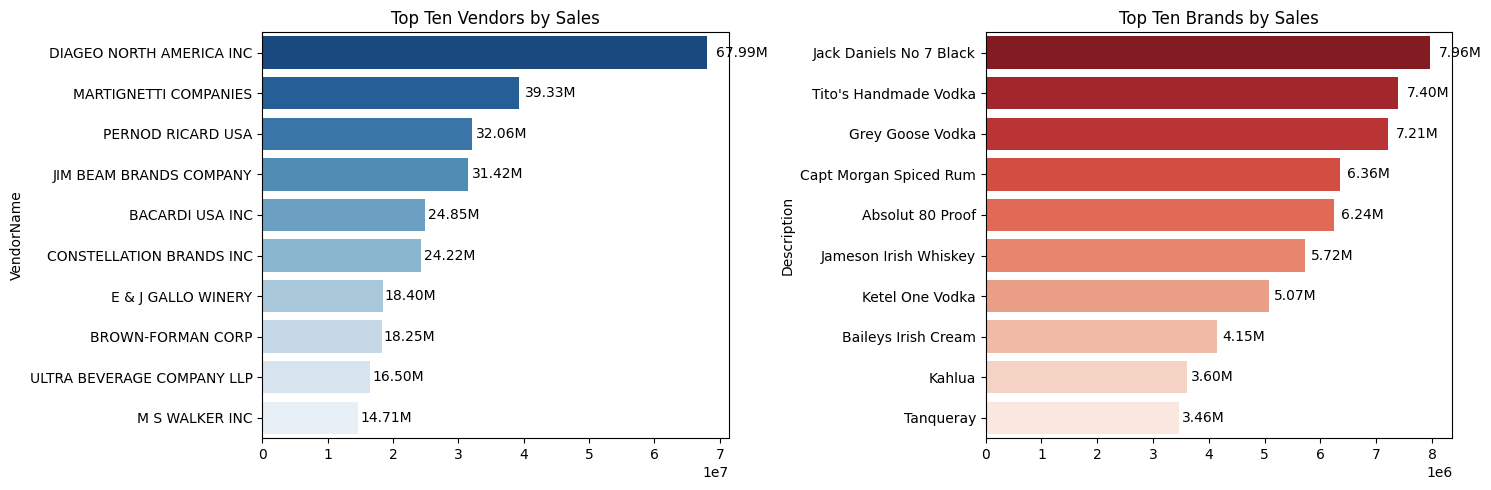

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Top Vendors
sns.barplot(y=top_vendors.index, x=top_vendors.values, ax=ax1, palette="Blues_r")
ax1.set_title("Top Ten Vendors by Sales")
add_bar_labels(ax1, format_dollars)

# Top Brands
sns.barplot(y=top_brands.index, x=top_brands.values, ax=ax2, palette="Reds_r")
ax2.set_title("Top Ten Brands by Sales")
add_bar_labels(ax2, format_dollars)

plt.tight_layout()
plt.show()


In [26]:
#Vendors contribute the most to total purchase dollars?
vendor_performance=df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum','GrossProfit':'sum','TotalSalesDollars':'sum'}).reset_index()
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [27]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [28]:
vendor_performance.sort_values('PurchaseContribution%',ascending=False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [29]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [30]:
#Top Ten vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [31]:
top_vendors['CumulativeContribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


In [32]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

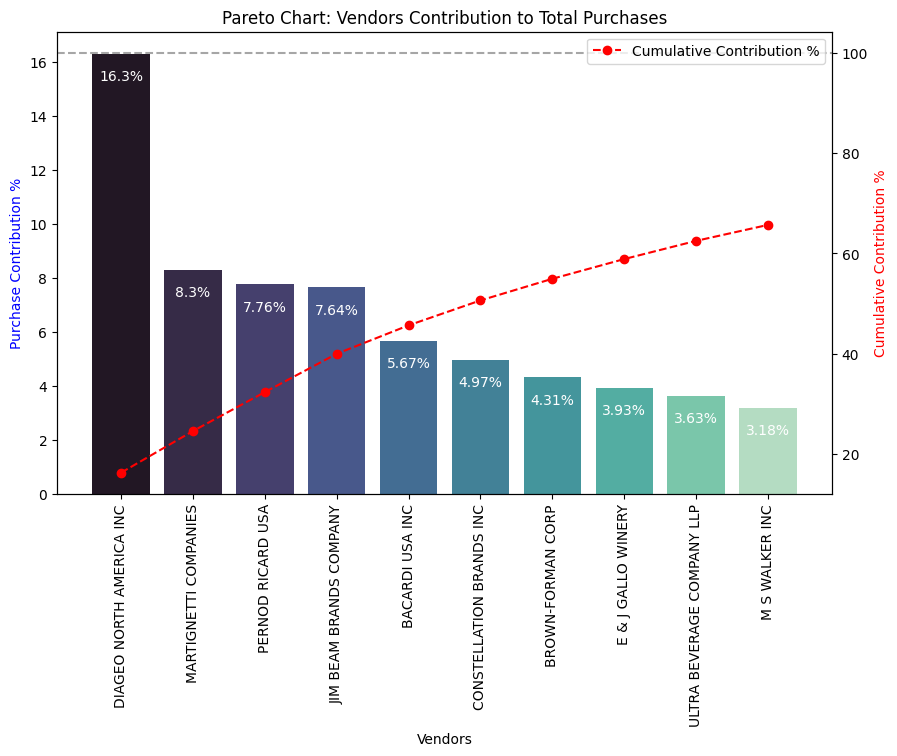

In [33]:
fig,ax1=plt.subplots(figsize=(10,6))
#Bar plot for Puchase Contribution%
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette="mako",ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+"%",ha="center",fontsize="10", color="white")

#Line plot for cumulative contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['CumulativeContribution%'],color='red',marker='o',linestyle='dashed',label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendors Contribution to Total Purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How much total of procurement is dependent on the top vendors?

In [34]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendors is 65.69%


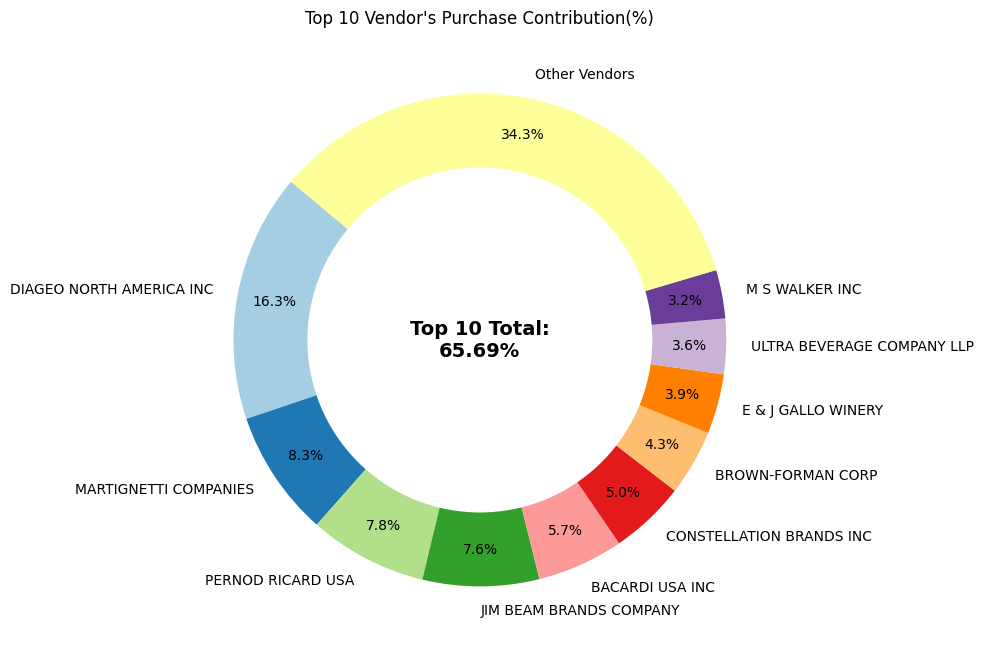

In [36]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors['PurchaseContribution%'].values)
total_contributions=sum(purchase_contributions)
remaining_contributions=100-total_contributions

#Append "Other Vendors" Category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

#Donut chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors
                              )
#Draw a white circle in the center to create a "Donut" effect
center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)
#Add total contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contributions:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()


Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [37]:
df["UnitPurchasePrice"]=df['TotalPurchaseDollars']/df['TotalQuantity']

In [38]:
df

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [39]:
df['OrderSize']=pd.qcut(df['TotalQuantity'],q=3,labels=["Small","Medium","Large"])

In [40]:
df[['OrderSize','TotalQuantity']]

,OrderSize,TotalQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [41]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


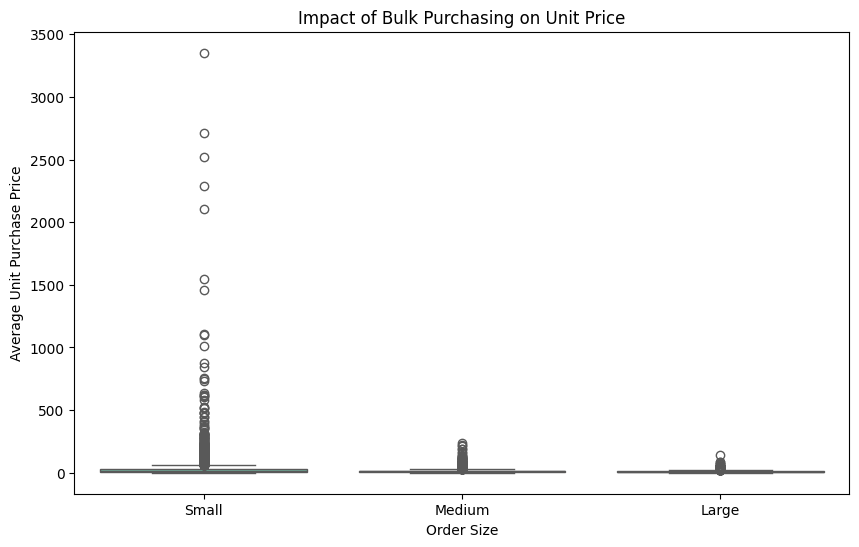

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

Which vendors have low inventory turnover, indicating excess stock and slow-moving stock products?

In [45]:
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,653,STATE WINE & SPIRITS,Tozai Typhoon Sake,24371,10.45,15.99,720.0,6,62.70,5.0,79.95,79.95,0.55,8014.98,17.25,21.575985,0.833333,1.275120,10.45,Small
8201,9552,M S WALKER INC,S S Pierce Ninety Nine Gin,398,5.63,7.49,1000.0,11,61.93,9.0,67.41,7.49,9.45,55551.82,5.48,8.129358,0.818182,1.088487,5.63,Small
8202,1392,CONSTELLATION BRANDS INC,R Mondavi Malbec Private Slt,16916,5.15,7.99,750.0,12,61.80,10.0,85.90,34.96,1.12,79528.99,24.10,28.055879,0.833333,1.389968,5.15,Small
8242,8352,LUXCO INC,Ezra Brooks Cinnamon Bourbon,8629,11.02,13.99,1750.0,5,55.10,3.0,56.97,37.98,5.51,10261.60,1.87,3.282429,0.600000,1.033938,11.02,Small


In [47]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean()

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
ALTAMAR BRANDS LLC,0.959375
AMERICAN SPIRITS EXCHANGE,0.875000
AMERICAN VINTAGE BEVERAGE,0.962801
ATLANTIC IMPORTING COMPANY,0.893078
...,...
WEIN BAUER INC,0.847015
WESTERN SPIRITS BEVERAGE CO,0.896930
WILLIAM GRANT & SONS INC,0.908237


In [50]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values("StockTurnover",ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, which vendors contribute the most to it?

In [55]:
df['UnsoldInventoryValue']=(df['TotalQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:',format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [56]:
#Aggregate Capital Locked per Vendor
inventory_Value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

#Sort Vendors with the higest locked capital
inventory_Value_per_vendor=inventory_Value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_Value_per_vendor['UnsoldInventoryValue']=inventory_Value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_Value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [58]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [60]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [64]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [66]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #Standard error
    t_critical=stats.t.pdf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

In [67]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

Top Vendors 95% CLI: (31.12, 31.23), Mean:31.18
Low Vendors 95% CLI: (41.43, 41.70), Mean:41.57


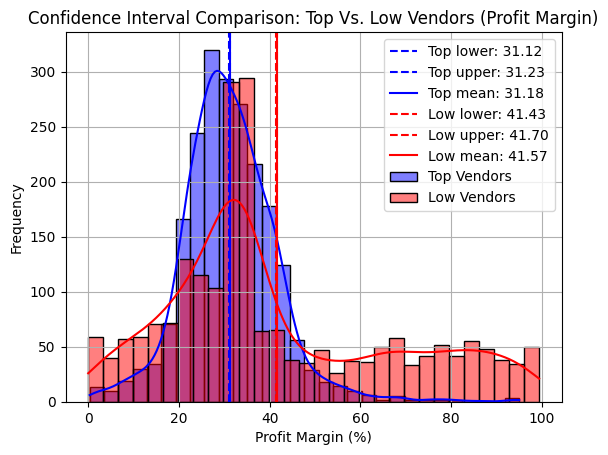

In [69]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CLI: ({top_lower:.2f}, {top_upper:.2f}), Mean:{top_mean:.2f}")
print(f"Low Vendors 95% CLI: ({low_lower:.2f}, {low_upper:.2f}), Mean:{low_mean:.2f}")

#Top Vendors Plot
sns.histplot(top_vendors, kde=True,color='blue',bins=30,alpha=0.5,label='Top Vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f"Top lower: {top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle='--',label=f"Top upper: {top_upper:.2f}")
plt.axvline(top_mean,color='blue',linestyle='-',label=f"Top mean: {top_mean:.2f}")

#Lower Vendors Plot
sns.histplot(low_vendors, kde=True,color='red',bins=30,alpha=0.5,label='Low Vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f"Low lower: {low_lower:.2f}")
plt.axvline(low_upper,color='red',linestyle='--',label=f"Low upper: {low_upper:.2f}")
plt.axvline(low_mean,color='red',linestyle='-',label=f"Low mean: {low_mean:.2f}")

#Finalising Plot
plt.title("Confidence Interval Comparison: Top Vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Is there a significant difference in profit margins between top-performing and low-performing vendors
H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors
H1(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [71]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

#Perform Two-sample T-Test
t_start,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print results
print(f"T-Statistics: {t_start:.4f}, P-Value: {p_value:.4f}")

if p_value<0.05:
    print("Reject H0: There is a significant difference in profit margins between top-performing and low-performing vendors")
else:
    print("Fail to Reject H0: No significant difference in profit margins")

T-Statistics: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top-performing and low-performing vendors


In [72]:
#Fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)

# Export to CSV
df.to_csv(r"data\vendor_sales_summary.csv", index=False)